This notebook shows how to:
- load the data from .mat form to mne
- create mne epochs.
- save and load mne epochs

In [10]:
import mne
import numpy as np
import scipy.io

# read .mat data file
filename = 'S1.mat'
file = scipy.io.loadmat(filename)
data = file['data']
data.shape

(64, 1500, 40, 6)

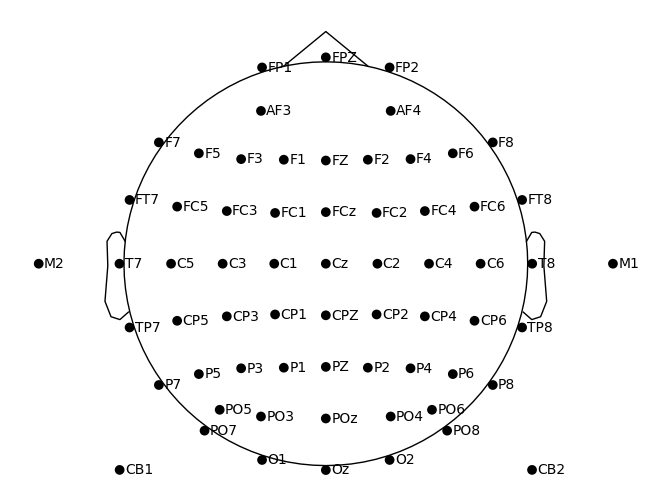

In [3]:
# read channel locations from file
montage = mne.channels.read_custom_montage('64-channels.loc')
plt = montage.plot()

In [4]:
# create mne info
n_channels = 64
sampling_freq = 250  # in Hertz
ch_types = ['eeg'] * 64

info = mne.create_info(montage.ch_names, sampling_freq, ch_types=ch_types)
info.set_montage(montage)
info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [5]:
# reshape data to shape(n_epochs, n_channels, n_times)
# (64, 1500, 40, 6) -> (64, 1500, 240)
data_reshaped = data.reshape(data.shape[0], data.shape[1], -1)
# (64, 1500, 240) -> (240, 64, 1500)
data_reshaped = np.transpose(data_reshaped, (2, 0, 1))
data_reshaped.shape

(240, 64, 1500)

In [6]:
# create events base on dataset description
# event = (timestamp, 0, event_id)
events = np.column_stack(
    (
        np.arange(0, 1500*240, 1500)+125, # start from 0.5 sec(125 timepoints) 
        np.zeros(240, dtype=int),
        np.tile(np.arange(0, 40) + 1, 6),
    )
)

# create event dictionary
# ex: 8.0Hz: 1
#     8.2Hz: 2
event_dict = {f"{8+0.2*(x-1):.1f}Hz": x for x in range(1, 41)}

# create epochs
# note: unit in mne is V, unit of data is μV , /10e6 to convert μV to V
epochs = mne.EpochsArray(data_reshaped/10e6, info, tmin=-0.5, events=events, event_id=event_dict)
epochs

Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated


Number of events,240
Events,10.0Hz: 610.2Hz: 610.4Hz: 610.6Hz: 610.8Hz: 611.0Hz: 611.2Hz: 611.4Hz: 611.6Hz: 611.8Hz: 612.0Hz: 612.2Hz: 612.4Hz: 612.6Hz: 612.8Hz: 613.0Hz: 613.2Hz: 613.4Hz: 613.6Hz: 613.8Hz: 614.0Hz: 614.2Hz: 614.4Hz: 614.6Hz: 614.8Hz: 615.0Hz: 615.2Hz: 615.4Hz: 615.6Hz: 615.8Hz: 68.0Hz: 68.2Hz: 68.4Hz: 68.6Hz: 68.8Hz: 69.0Hz: 69.2Hz: 69.4Hz: 69.6Hz: 69.8Hz: 6
Time range,-0.500 – 5.496 s
Baseline,off


/var/folders/0t/pngzvr592n94h_xwfmfsskqr0000gn/T/ipykernel_23245/997379499.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  plt = epochs[:5].plot(events=events, event_id=event_dict)


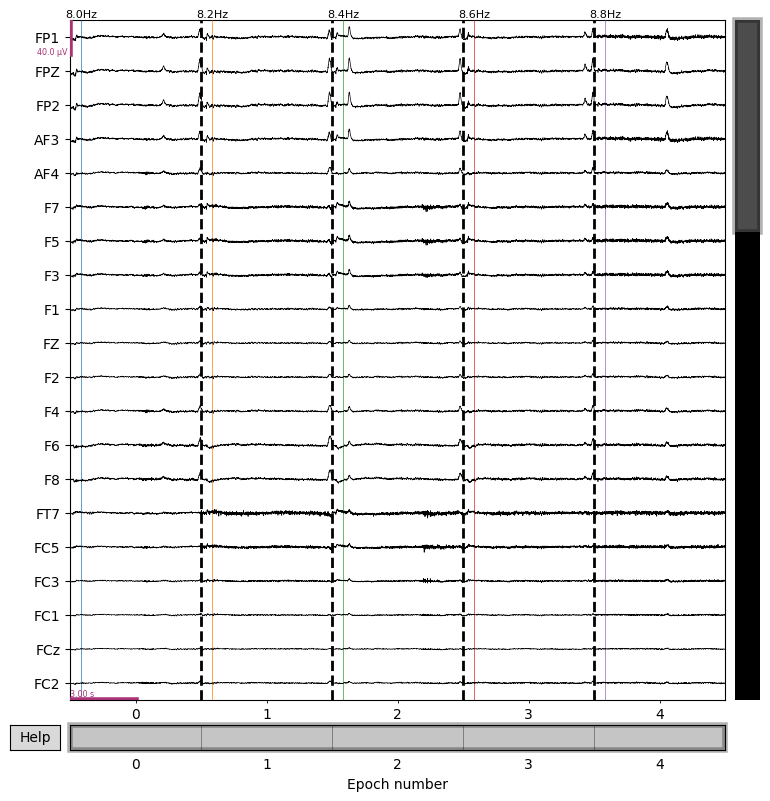

In [9]:
plt = epochs[:5].plot(events=events, event_id=event_dict)

In [11]:
# save epochs to file (.fif)
epochs.save('S1-epo.fif')

In [12]:
# load epochs from file
epochs_load = mne.read_epochs('S1-epo.fif')
epochs_load

Reading /Users/user/Desktop/BCI/EEG_SSVEP/brenckmark_dataset/S1-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    5496.00 ms
        0 CTF compensation matrices available
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated


Number of events,240
Events,10.0Hz: 610.2Hz: 610.4Hz: 610.6Hz: 610.8Hz: 611.0Hz: 611.2Hz: 611.4Hz: 611.6Hz: 611.8Hz: 612.0Hz: 612.2Hz: 612.4Hz: 612.6Hz: 612.8Hz: 613.0Hz: 613.2Hz: 613.4Hz: 613.6Hz: 613.8Hz: 614.0Hz: 614.2Hz: 614.4Hz: 614.6Hz: 614.8Hz: 615.0Hz: 615.2Hz: 615.4Hz: 615.6Hz: 615.8Hz: 68.0Hz: 68.2Hz: 68.4Hz: 68.6Hz: 68.8Hz: 69.0Hz: 69.2Hz: 69.4Hz: 69.6Hz: 69.8Hz: 6
Time range,-0.500 – 5.496 s
Baseline,off
